Major Project Face Mask Detiction Model



In [1]:
# IMPORTANT IMPORTS

import numpy as np
import cv2
import os
import matplotlib.pyplot as plt


In [2]:
# CREATING EMPTY LISTS

images,lables=[],[]


In [3]:
# STORING THE IMAGES 

folderlist=list(os.listdir('D:/python/CSV Files/dataset'))
for i in folderlist:
    filename=list(os.listdir('D:/python/CSV Files/dataset/'+str(i)))
    for src in filename:
        img=cv2.imread('D:/python/CSV Files/dataset/'+str(i)+'/'+str(src))
        if(img is not None):
            face=cv2.CascadeClassifier('D:/python/Modules/haarcascade_frontalface_default.xml')
            fimage=face.detectMultiScale(img,1.1,11)
            if len(fimage)==1:
                for(x,y,w,h) in fimage:
                    gray=img[y:y+h+1,x:x+w+1]
                    gray=cv2.cvtColor(gray,cv2.COLOR_BGR2GRAY)
                    gray=gray/255
            try:
                gray=cv2.resize(gray,(40,40))
                images.append(gray)
                if i=='with_mask':
                    lables.append(1)
                else:
                    lables.append(0)
            except:
                pass
    print('Inside Folder : '+str(i))


Inside Folder : without_mask
Inside Folder : with_mask


In [4]:
# CONVERTING THE LIST INTO ARRAY

images=np.array(images)
lables=np.array(lables)


In [5]:
lables.shape

(3810,)

In [6]:
images.shape

(3810, 40, 40)

In [7]:
# Make a funtion

def pre(img):
    img=img.reshape(40,40,1)
    return img
    

In [8]:
# MAPPING

train_feature=list(map(pre,images))
train_feature=np.array(train_feature)


In [9]:
train_feature.shape

(3810, 40, 40, 1)

In [10]:
# Image Augmentation

import keras
from keras.preprocessing.image import ImageDataGenerator
Data=ImageDataGenerator(width_shift_range=0.12,height_shift_range=0.12,shear_range=0.1,zoom_range=0.13,rotation_range=15)

# scan and generate the images

Data.fit(train_feature)
gimages=Data.flow(train_feature,lables,batch_size=25)


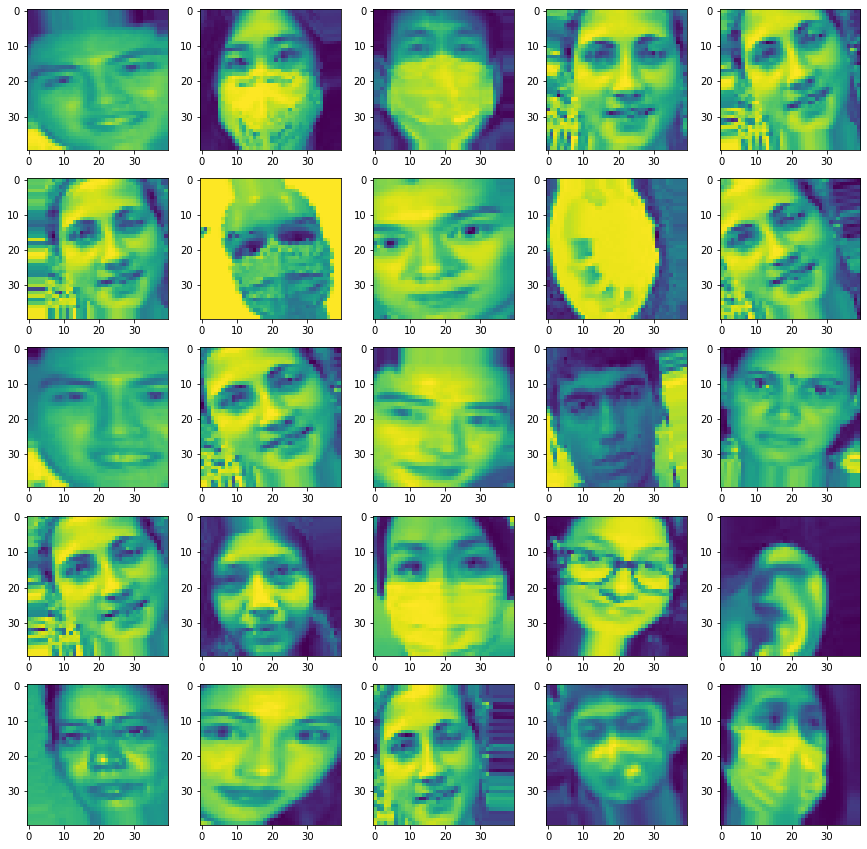

In [11]:
# SEE SOME SAMPLE GENERATED IMAGES

x,y=next(gimages)
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x[i].reshape(40,40))
plt.show()


In [21]:
# MODEL ARCHITECTURE

import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout

# ONE NOT ENCODING

train_target=to_categorical(lables)

# MODEL LAYERS

model=Sequential()
model.add(Conv2D(180,(2,2),activation='relu',input_shape=(40,40,1)))
model.add(Conv2D(150,(2,2),activation='relu'))
model.add(MaxPooling2D((3,3)))
model.add(Conv2D(120,(2,2),activation='relu'))
model.add(Conv2D(90,(2,2),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(60,(2,2),activation='relu'))
model.add(Flatten())
model.add(Dense(2000,activation='relu'))
model.add(Dense(1500,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(1200,activation='relu'))
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(800,activation='relu'))
model.add(Dense(600,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(500,activation='relu'))
model.add(Dense(400,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(300,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(2,activation='softmax'))


In [22]:
# MODEL COPILE

from keras.optimizers import Adam
model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])


In [23]:
# MODEL FITTING

model.fit(Data.flow(train_feature,train_target,batch_size=25),epochs=40)


Epoch 1/40
153/153 [==============================] - 40s 255ms/step - loss: 0.6948 - accuracy: 0.4931
Epoch 2/40
153/153 [==============================] - 38s 251ms/step - loss: 0.6856 - accuracy: 0.5269
Epoch 3/40
153/153 [==============================] - 39s 254ms/step - loss: 0.4661 - accuracy: 0.8067
Epoch 4/40
153/153 [==============================] - 38s 251ms/step - loss: 0.3941 - accuracy: 0.8419
Epoch 5/40
153/153 [==============================] - 39s 253ms/step - loss: 0.4120 - accuracy: 0.8246
Epoch 6/40
153/153 [==============================] - 39s 257ms/step - loss: 0.3468 - accuracy: 0.8520
Epoch 7/40
153/153 [==============================] - 41s 267ms/step - loss: 0.3356 - accuracy: 0.8616
Epoch 8/40
153/153 [==============================] - 39s 257ms/step - loss: 0.3212 - accuracy: 0.8678
Epoch 9/40
153/153 [==============================] - 39s 257ms/step - loss: 0.3172 - accuracy: 0.8662
Epoch 10/40
153/153 [==============================] - 38s 248ms/step - l

In [27]:
# CREATE A FUNTION TO CHECK THE CLASS

def check(i):
    if i==0:
        return 'without_mask'
    else:
        return 'with_mask'


In [28]:
# VEDIO CAPTURING

import cv2
import numpy as np

vedio=cv2.VideoCapture(0)
vedio.set(3,720)
vedio.set(4,720)
vedio.set(10,180)


True

In [29]:
# CHECK FROM YOUR WEB CAM

font=cv2.FONT_HERSHEY_SIMPLEX

while True:
    src,orignalimage=vedio.read()
    img=np.asarray(orignalimage)
    face=cv2.CascadeClassifier('D:/python/Modules/haarcascade_frontalface_default.xml')
    fimage=face.detectMultiScale(img,1.15,9)
    cv2.putText(orignalimage,'prediction : ',(40,20),font,0.9,(100,50,150),4)
    cv2.putText(orignalimage,'probability : ',(40,80),font,0.9,(101,51,151),4)
    if len(fimage)==1:
        for(x,y,w,h) in fimage:
            cv2.rectangle(orignalimage,(x,y),(x+w,y+h),(0,255,0),3)
            gray=img[y:y+h+1,x:x+w+1]
            gray=cv2.cvtColor(gray,cv2.COLOR_BGR2GRAY)
            gray=gray/255
            gray=cv2.resize(gray,(40,40))
            gray=gray.reshape(1,40,40,1)
            prediction=model.predict(gray)
            probability=np.amax(prediction)
            index=model.predict_classes(gray)
            if probability>=0.75:
                cv2.putText(orignalimage, '  ' + str(index) + '  ' + str(check(index)) , (240,20) , font , 0.9 , (250,150,50) , 4)
                cv2.putText(orignalimage, '  ' + str(round(probability*100,2)) , (220,80) , font , 0.9 , (150,250,50) , 4)
    cv2.imshow('Result',orignalimage)              
    cv2.waitKey(1) 
    if cv2.waitKey(1)==ord("x"):
        cv2.destroyAllWindows()
        break  


C:\Users\Krito\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
